In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('fraud_details.csv')
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [15]:
df.notnull().sum()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [20]:
category = df.columns[df.dtypes=='object']
numerical = df.columns[df.dtypes!='object']
category,numerical

(Index(['type', 'nameOrig', 'nameDest'], dtype='object'),
 Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
        'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
       dtype='object'))

In [19]:
category_data = df[category]
numerical_data = df[numerical]
category_data.head()

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703


In [6]:
len(df['nameOrig'].unique()), len(df['nameDest'].unique()),len(df)

(6353307, 2722362, 6362620)

<AxesSubplot:xlabel='nameDest', ylabel='count'>

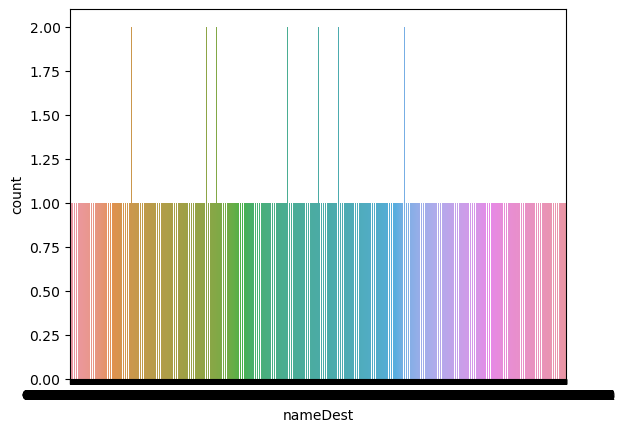

In [62]:
# Analysis on the destination money transfer for finding accounts which are more proun to Fraud.
sns.countplot(data=df[df['isFraud']==1], x='nameDest')

In [11]:
df[df['isFraud']==1].nameDest.value_counts()

C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: nameDest, Length: 8169, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

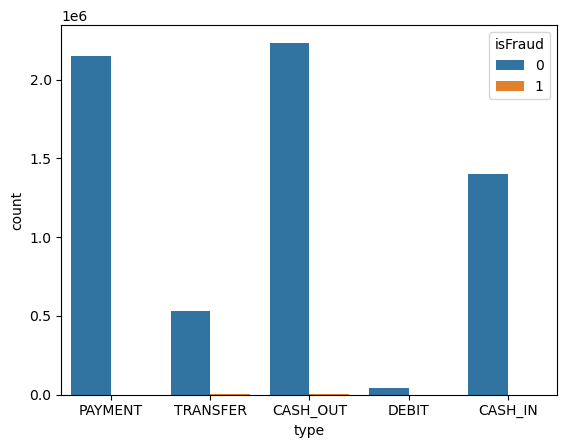

In [29]:
sns.countplot(x='type',data=df,hue='isFraud')

<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

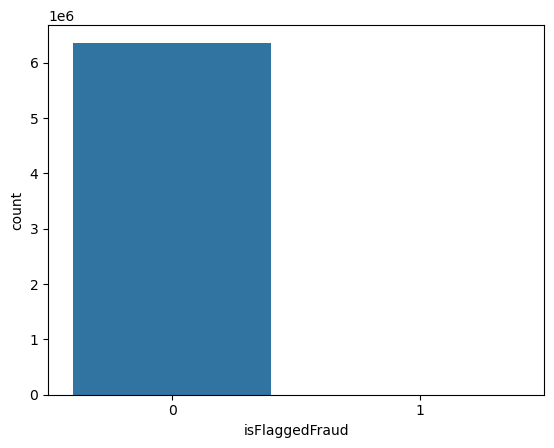

In [31]:
sns.countplot(x='isFlaggedFraud',data=df)

In [4]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [5]:
df_fraud = df[df['isFraud']==1]

In [35]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


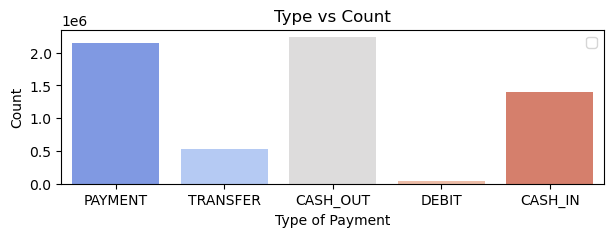

In [15]:
df_fraud = df[df['isFraud']==1]
fig = plt.figure(figsize=(7,2))
ax = fig.add_subplot(1,1,1)
sns.countplot(x='type', data=df, palette='coolwarm')
plt.xlabel('Type of Payment')
plt.ylabel('Count')
plt.title('Type vs Count')
plt.legend()

In [15]:
df_fraud.nunique()

step               741
type                 2
amount            3977
nameOrig          8213
oldbalanceOrg     4094
newbalanceOrig     145
nameDest          8169
oldbalanceDest    2863
newbalanceDest    4067
isFraud              1
isFlaggedFraud       2
dtype: int64

In [13]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

c:\Users\Pankaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Pankaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(1.0, 743.0)

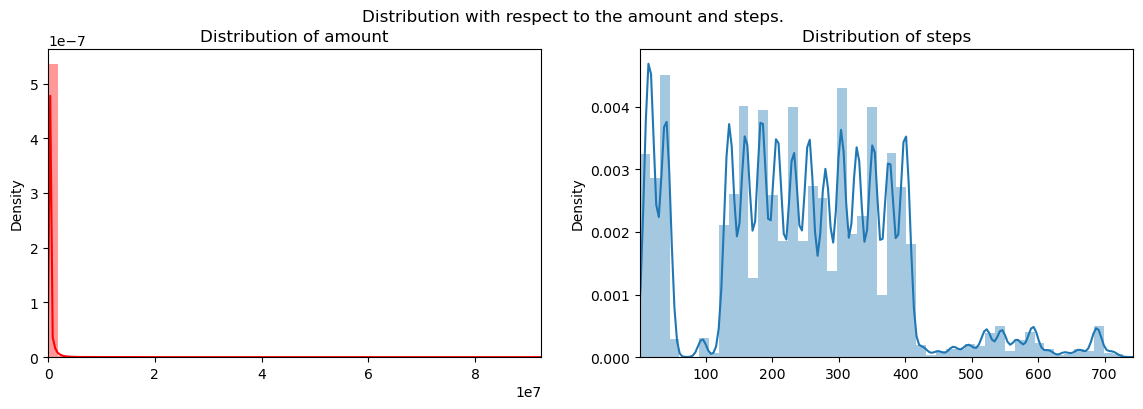

In [16]:
# seeing the distribution of amount and steps 
fig, ax = plt.subplots(1, 2, figsize=(14,4))
amount = np.array(df['amount'].values)
steps = np.array(df['step'].values)
fig.suptitle('Distribution with respect to the amount and steps.')
sns.distplot(amount,ax=ax[0], color='r')
ax[0].set_title('Distribution of amount')
ax[0].set_xlim(min(amount),max(amount))


sns.distplot(steps, ax=ax[1])
ax[1].set_title('Distribution of steps')
ax[1].set_xlim(min(steps), max(steps))
# plt.legend()

In [19]:
print('Fraud Percentage:',len(df[df['isFraud']==1])/len(df['isFraud'])*100)
print('No Fraud Percentage:', 100-len(df[df['isFraud']==1])/len(df['isFraud'])*100)

Fraud Percentage: 0.12908204481801522
No Fraud Percentage: 99.87091795518198


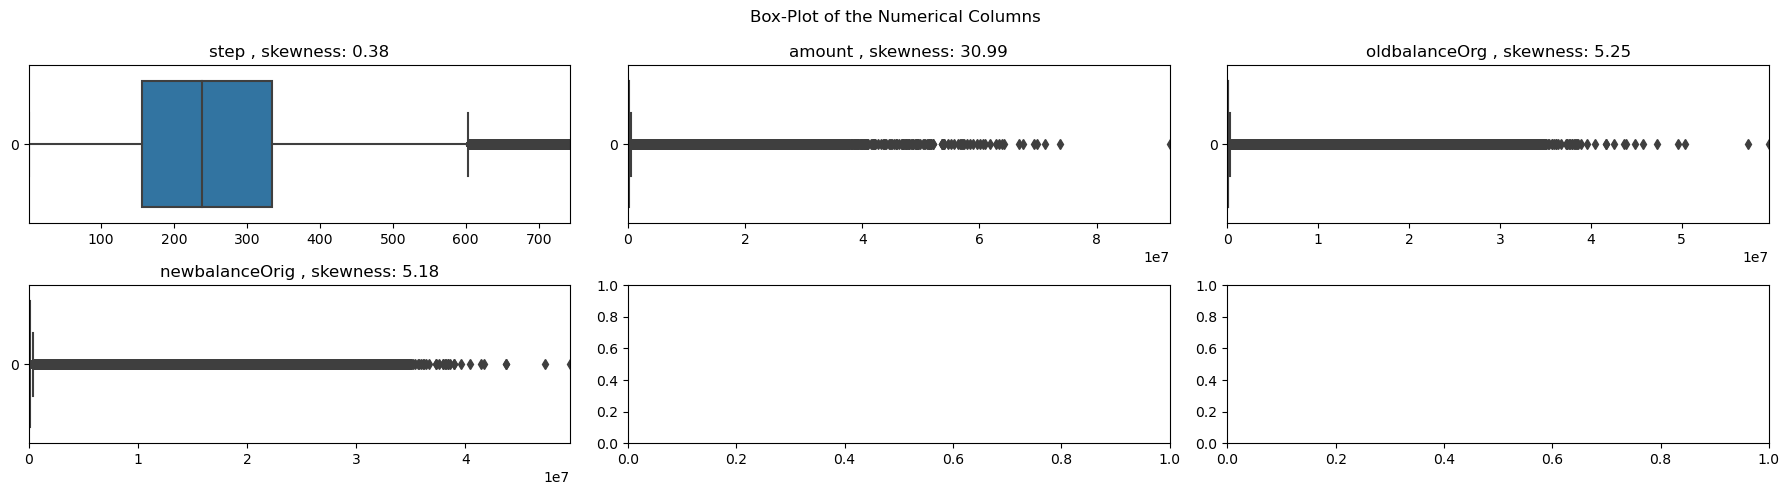

In [43]:
def boxplot_visual(data, column):
    fig, ax = plt.subplots(2,3,figsize=(18,5))
    fig.suptitle('Box-Plot of the Numerical Columns')
    ax = ax.flatten()
    for i, feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i],orient='h')
        ax[i].set(title=feature+' , skewness: '+str(round(data[feature].skew(axis=0, skipna=True),2)),xlim=(min(data[feature]),max(data[feature])))
    
boxplot_visual(df,numerical[:-2])
plt.tight_layout()


In [31]:
category

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [27]:
df_final = df.drop(['nameOrig','nameDest', 'isFlaggedFraud'],axis=1)

In [28]:
df_final.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [29]:
df_final = pd.get_dummies(data=df_final, drop_first=True)

In [30]:
df_final.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [39]:
numerical=df.select_dtypes(include=['int','float']).columns
numerical = numerical[:-2]


In [40]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()

In [42]:
for feature in numerical:
    df_final[feature] = scalar.fit_transform(df_final[feature].values.reshape(-1,1))
df_final.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.329609,-0.332932,1.452991,1.111175,-0.140722,-0.193057,0,0,0,1,0
1,-1.329609,-0.373762,0.065610,0.134375,-0.140722,-0.193057,0,0,0,1,0
2,-1.329609,-0.382380,-0.130708,0.000000,-0.140722,-0.193057,1,0,0,0,1
3,-1.329609,-0.382380,-0.130708,0.000000,-0.118260,-0.193057,1,1,0,0,0
4,-1.329609,-0.323571,0.254820,0.207169,-0.140722,-0.193057,0,0,0,1,0


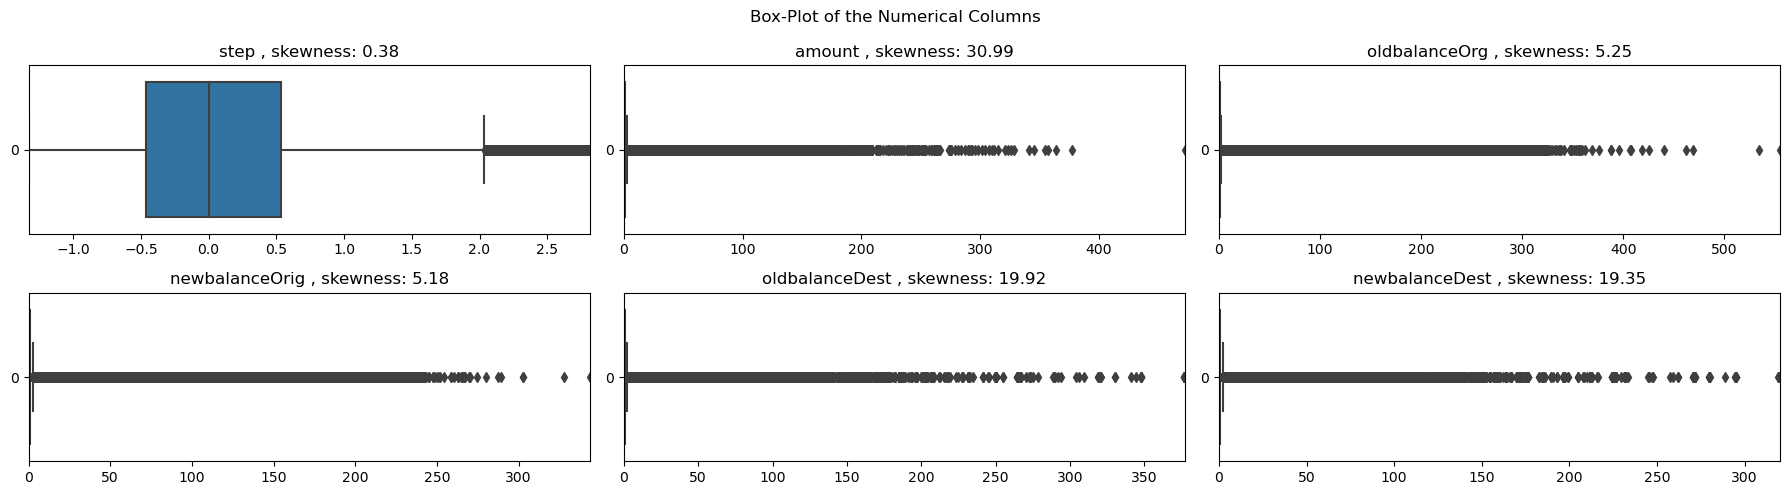

In [44]:
boxplot_visual(df_final,numerical)
plt.tight_layout()

In [50]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


# Model Building

In [45]:
x = df_final.drop('isFraud', axis=1)
y = df_final['isFraud']

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [49]:
a = zip(x.columns,model.feature_importances_)
for i in a:
    print(i)

('step', 0.13617193071530614)
('amount', 0.2506939120309752)
('oldbalanceOrg', 0.27744532692365054)
('newbalanceOrig', 0.07974640656811417)
('oldbalanceDest', 0.05471361395806374)
('newbalanceDest', 0.18731712976227263)
('type_CASH_OUT', 0.009785068950219614)
('type_DEBIT', 0.0)
('type_PAYMENT', 1.1083232666827276e-06)
('type_TRANSFER', 0.004125502768131329)


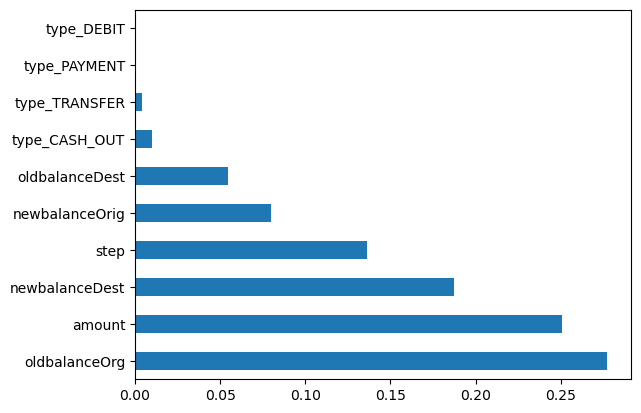

In [51]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [53]:
x_train,x_test, y_train, y_test = train_test_split(x, y, train_size=.7)
# Here StratifiedKFold is the cross validation technique which is use to reduce the over-fitting.
skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

In [55]:
model1 = LogisticRegression()
param = {'C':10.0**np.arange(-1,2)}
lrs = RandomizedSearchCV(model1, param, cv=skf, n_jobs=-1, scoring='accuracy')
lrs.fit(x_train, y_train)

c:\Users\Pankaj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Pankaj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  1. , 10. ])},
                   scoring='accuracy')

done the hyper-parameter tunning along with the model training.

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [61]:
y_pred=lrs.predict(x_test)
print('Confusion Metrics:',confusion_matrix(y_test,y_pred))
print('Model Score:',accuracy_score(y_test,y_pred))
print('Model Report:',classification_report(y_test,y_pred))

Confusion Metrics: [[1906191     143]
 [   1257    1195]]
Model Score: 0.9992665495241478
Model Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906334
           1       0.89      0.49      0.63      2452

    accuracy                           1.00   1908786
   macro avg       0.95      0.74      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



In [65]:
df = df.head(300)
df.to_csv('fraud_detail.csv', index=False)
